2.PANDAS

In [ ]:
import pandas as pd
import numpy as np

data = {
    "ID" : [101, 102, 103, 104, 105],
    "Name" : ["Khanh Linh", None, "Viet Vu", "Phuc Nguyen", "Gia Long"],
    "Tuoi" : [19, 22, 21, None, 20],
    "Salary": [50000, 35000, 65000, 100000, None]
}

df = pd.DataFrame(data)
df


,ID,Name,Tuoi,Salary
0,101,Khanh Linh,19.0,50000.0
1,102,None,22.0,35000.0
2,103,Viet Vu,21.0,65000.0
3,104,Phuc Nguyen,NaN,100000.0
4,105,Gia Long,20.0,NaN


Thực hành 1:
- Điền giá trị thiếu trong cột tuổi bằng trung bình
- Loại bỏ các dòng chứa giá trị thiếu
- Điền giá trị thiếu trong name bằng "Unknow"ArithmeticError
- Điền giá trị thiếu trong Salary bằng phương pháp Interpolation

In [5]:
# Điền giá trị thiếu trong 'Tuoi' bằng trung bình
df.loc[:, "Tuoi"] = df["Tuoi"].fillna(df["Tuoi"].mean())

# Loại bỏ các dòng chứa giá trị thiếu
df.dropna(subset=["ID", "Tuoi", "Salary"], inplace=True)

# Điền giá trị thiếu trong 'Name' bằng "Unknow"
df.loc[:, "Name"] = df["Name"].fillna("Unknow")

# Điền giá trị thiếu trong 'Salary' bằng phương pháp Interpolation
df.loc[:, "Salary"] = df["Salary"].interpolate(method='linear')

print(df)


    ID         Name  Tuoi    Salary
0  101   Khanh Linh  19.0   50000.0
1  102       Unknow  22.0   35000.0
2  103      Viet Vu  21.0   65000.0
3  104  Phuc Nguyen  20.5  100000.0


Thực hành 2:
- cho dữ liệu

In [8]:
df1 = pd.DataFrame({
    "Id":  [1, 2, 3],
    "Score_ A" : [70, 90, 85]
})
df2 = pd.DataFrame({
    "Id":  [3, 4, 5],
    "Score_ B" : [62, 91, 75]
})

- Thực hiện Merge trên cột id (InnerJoin, LeftJoin, Outer Join)
- Nối Data Frame theo chiều dọc
- Gộp df1 và df2 để điền giá chị thiếu

In [12]:
# Merge theo cột 'ID'
df_inner = pd.merge(df1, df2, on="Id", how="inner")  # Inner Join
df_left = pd.merge(df1, df2, on="Id", how="left")    # Left Join
df_outer = pd.merge(df1, df2, on="Id", how="outer")  # Outer Join

# Nối DataFrame theo chiều dọc
df_concat = pd.concat([df1, df2], ignore_index=True)

# Gộp df1 và df2 để điền giá trị thiếu
df_combined = df1.combine_first(df2)

print("Inner Join:\n", df_inner)
print("Left Join:\n", df_left)
print("Outer Join:\n", df_outer)
print("Nối dọc:\n", df_concat)
print("Gộp df1 và df2 để điền giá trị thiếu:\n", df_combined)

Inner Join:
    Id  Score_ A  Score_ B
0   3        85        62
Left Join:
    Id  Score_ A  Score_ B
0   1        70       NaN
1   2        90       NaN
2   3        85      62.0
Outer Join:
    Id  Score_ A  Score_ B
0   1      70.0       NaN
1   2      90.0       NaN
2   3      85.0      62.0
3   4       NaN      91.0
4   5       NaN      75.0
Nối dọc:
    Id  Score_ A  Score_ B
0   1      70.0       NaN
1   2      90.0       NaN
2   3      85.0       NaN
3   3       NaN      62.0
4   4       NaN      91.0
5   5       NaN      75.0
Gộp để điền giá trị thiếu:
    Id  Score_ A  Score_ B
0   1        70        62
1   2        90        91
2   3        85        75


In [18]:
data = pd.DataFrame({
    "Id": np.arange(1, 1000000),
    "Value": np.random.randint(1, 100000000, size=999999)
})

- Dùng .astype để tối ưu hóa bộ nhớ
- tìm 5 giá trị phổ biến trong cột value
- sử dụng query để lọc dữ liệu nhanh hơn df[df["value"] > 90]

In [19]:
# Chuyển đổi kiểu dữ liệu để tối ưu bộ nhớ
data["Id"] = data["Id"].astype("int32")
data["Value"] = data["Value"].astype("int8")

# Tìm 5 giá trị phổ biến nhất trong cột Value
most_common_values_large = data["Value"].value_counts().head(5)

# Lọc dữ liệu nhanh bằng query
filtered_large_df = data.query("Value > 90")

print("DataFrame lớn:\n", data.info())
print("5 Giá trị phổ biến nhất trong Value:\n", most_common_values_large)
print("Dữ liệu có Value > 90:\n", filtered_large_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Id      999999 non-null  int32
 1   Value   999999 non-null  int8 
dtypes: int32(1), int8(1)
memory usage: 4.8 MB
DataFrame lớn:
 None
5 Giá trị phổ biến nhất trong Value:
 Value
 82     4104
 111    4082
 86     4042
 127    4025
-72     4023
Name: count, dtype: int64
Dữ liệu có Value > 90:
             Id  Value
4            5     99
27          28    110
29          30    103
38          39    111
42          43     99
...        ...    ...
999972  999973    115
999974  999975     99
999975  999976    125
999986  999987    123
999993  999994     93

[144233 rows x 2 columns]


3. Matplotlib

In [22]:
# Biểu đồ nhiều đường
# Cho dữ liệu sau
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 10, 108)
y1 = np.sin(t)
y2 = np.cos(t)
y3 = np.sin(t) * np.cos(t)

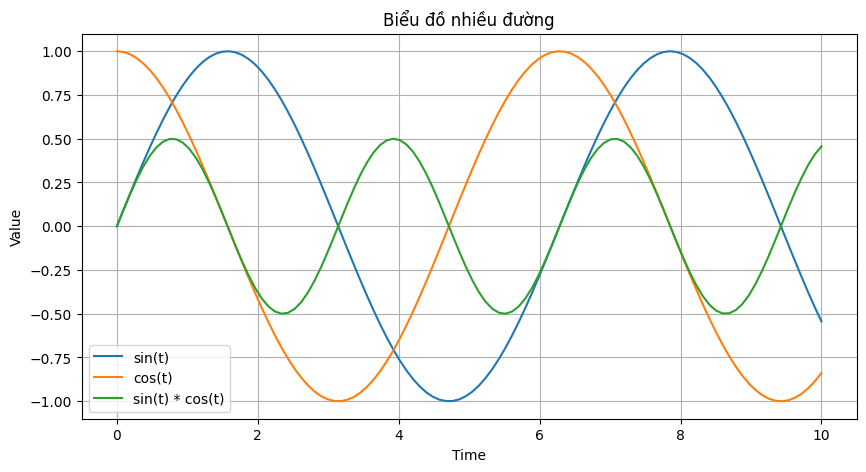

In [23]:
# Tạo biểu đồ các đường theo thời gian
plt.figure(figsize=(10, 5))
plt.plot(t, y1, label="sin(t)")
plt.plot(t, y2, label="cos(t)")
plt.plot(t, y3, label="sin(t) * cos(t)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Biểu đồ nhiều đường")
plt.legend()
plt.grid()
plt.show()


In [35]:
# Biểu đồ cột
labels = ["Q1", "Q2", "Q3", "Q4"]
A = [500, 700, 800, 600]
B = [450, 350, 650, 750]
C = [500, 250, 850, 600]

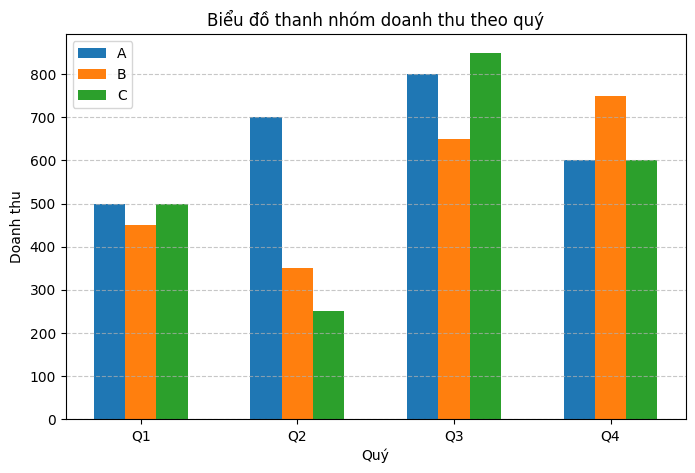

In [37]:
# Vẽ biểu đồ thanh nhóm thể thiện doanh thu của A, B, C trong 4 quý
x = np.arange(len(labels))
width = 0.2

plt.figure(figsize=(8, 5))
plt.bar(x - width, A, width, label="A")
plt.bar(x, B, width, label="B")
plt.bar(x + width, C, width, label="C")
plt.xticks(ticks=x, labels=labels)
plt.xlabel("Quý")
plt.ylabel("Doanh thu")
plt.title("Biểu đồ thanh nhóm doanh thu theo quý")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()




In [41]:
# Biểu đồ tròn

Cty = ["A", "B", "C", "D"]
thiphan = [30, 25, 25, 20]
color = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]

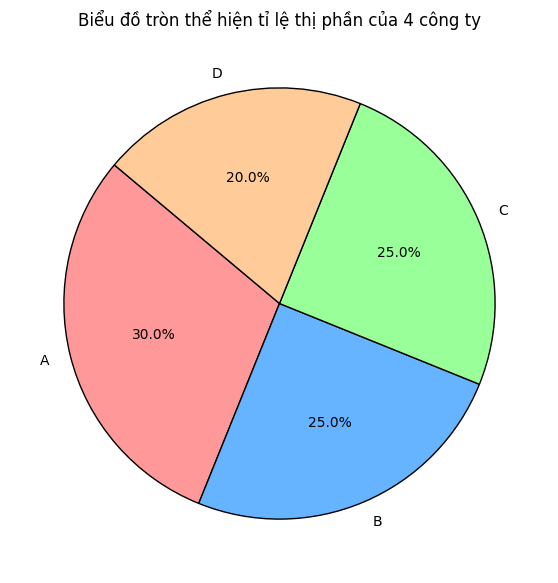

In [42]:
# Tạo biểu đồ tròn thể hiện tỉ lệ thị phần của 4 công ty
plt.figure(figsize=(7, 7))
plt.pie(thiphan, labels=Cty, colors=color, autopct="%.1f%%", startangle=140, wedgeprops={"edgecolor": "black"})
plt.title("Biểu đồ tròn thể hiện tỉ lệ thị phần của 4 công ty")
plt.show()


In [43]:
# Biểu đồ phân tán

x = np.random.rand(100)
y = np.random.rand(100)
sizes = np.random.rand(100)*300
color = np.random.rand(100)

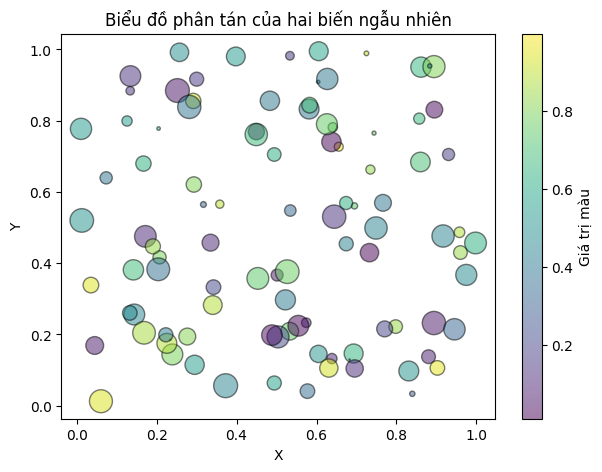

In [45]:
# Tạo biểu đồ phân tán của hai biến ngẫu nhiên
plt.figure(figsize=(7, 5))
plt.scatter(x, y, s=sizes, c=color, alpha=0.5, edgecolors="black", cmap="viridis")
plt.colorbar(label="Giá trị màu")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Biểu đồ phân tán của hai biến ngẫu nhiên")
plt.show()


In [52]:
# Biểu đồ nhiệt
import seaborn as sns
data = np.random.rand(10,10)

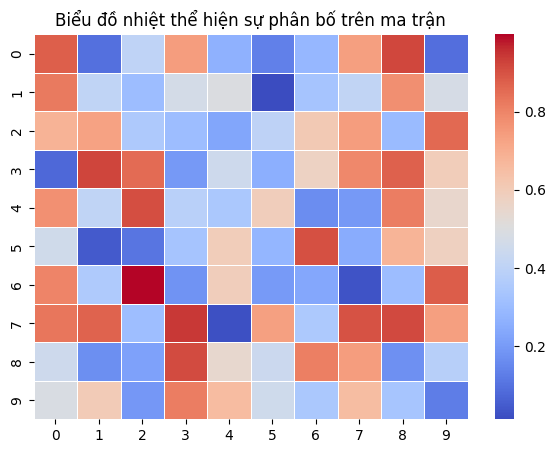

In [59]:
# vẽ một heatmap thể hiện sự phân bố trên ma trận
plt.figure(figsize=(7, 5))
sns.heatmap(data, annot=False , cmap="coolwarm", linewidths=0.5)
plt.title("Biểu đồ nhiệt thể hiện sự phân bố trên ma trận")
plt.show()